Alexander Hyde<br>
Phys 434 AB<br>
Partner: Max Wang <br>
# Lab 3

# Problem 1

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

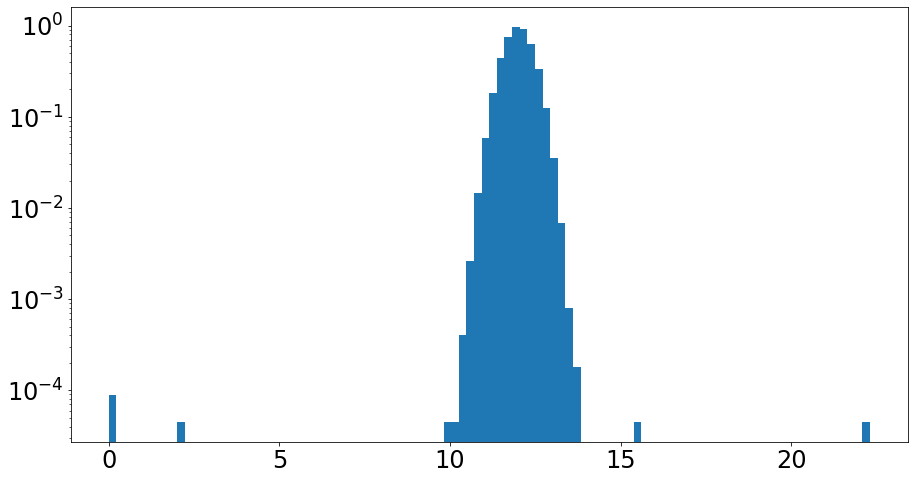

In [27]:
plt.rcParams["figure.figsize"] = (15,8)

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
plt.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

**A.** On the logarithmic scale, the mass of temperature readings between 10 and 14 Kelvin (K) appears parabolic. The first thing I want to know is what the exact mean and standard deviation of this distribution is:

In [28]:
def distProps(d):
    mean = sum(d) / len(d)
    squares = np.square(np.add(d,-mean))
    sDev = math.sqrt(sum(squares) / (len(d)-1))
    return mean,sDev

mean,sDev = distProps(d)
print("Mean: " + str(mean))
print("Standard Deviation: " + str(sDev))

Mean: 11.999603146613673
Standard Deviation: 0.40620479170363316


Since I think the distribution is parabolic, I'm going to try and fit a Gaussian pdf over it using the mean and standard deviation I have:

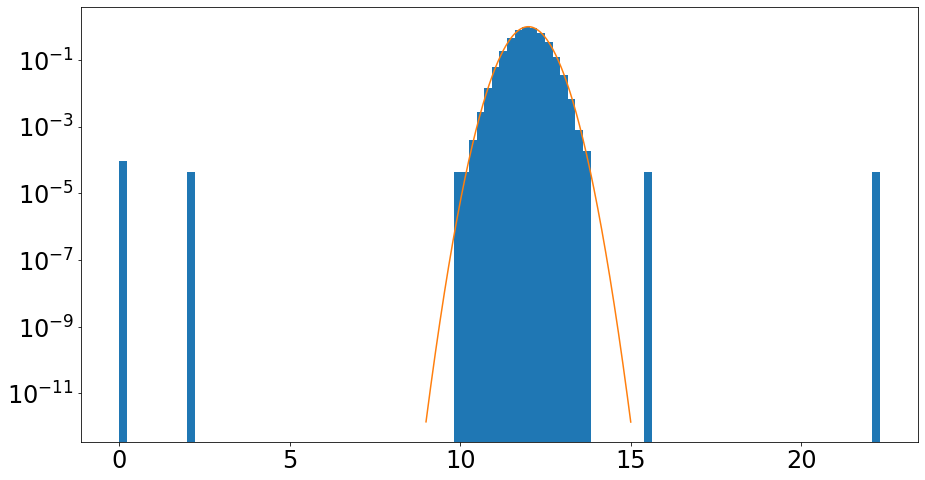

In [29]:
x = np.linspace(9,15,1000)
f = stats.norm.pdf(x,mean,sDev)

fig, ax = plt.subplots(1, 1)
count,bins,bars = plt.hist(d,100,density=True)
plt.plot(x,f)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

This guessed Gaussian pdf fits fairly nicely over the distribution, and reveals some fairly obvious outlier temperature readings like the ones around 0 K or 22 K. *I want to know, which temperature readings are outliers/signals that aren't part of the background distribution?* By answering this question, I'll be able to isolate these temperature readings as part of the thermal background. To answer this, I'll take the ratio of the number of T-readings in each bin of the histogram to the integral of my pdf-fit across those respective bins. My statistical threshold for a good ratio in this case is going to be 2, any ratio higher than 2 will be considered a bad T-reading.

In [30]:
np.seterr(divide='ignore', invalid='ignore')
binW = np.diff(bins)[0]

def rangePass(bMin,bMax):
    rList = []
    for i in d:
        if bMin <= i and i <= bMax: 
            rList = np.append(rList,[i])
    return rList

def testDist(sensitivity):
    f = np.zeros(len(bins) - 1)
    badT = []
    for i in range(len(bins) - 1):
        f[i] = stats.norm.cdf(bins[i]+binW,mean,sDev) - stats.norm.cdf(bins[i],mean,sDev)
        if np.divide(count[i]*binW,f[i]) > sensitivity:
            badT = np.append(badT,rangePass(bins[i],bins[i]+binW))
    return badT,f

badT,f = testDist(2)
print("T-readings tested bad: " + str(badT))
print(str(len(badT)) + " readings tested bad")

T-readings tested bad: [ 0.   0.   2.1 10.  15.6 22.3]
6 readings tested bad


In a table, here're my test's results:

||True T|Bad T|
|-|-|-|
|Tested Good|100000|2|
|Tested Bad|0|6|

As you can see from my list of bad T-readings, all of them came from the 8 readings appended onto the Normal RVS, so none of the truly good T-readings were tested as bad, but only 6 of the truly bad readings were tested bad.

**B.** This test didn't omit any good T-readings. But I found from changing my sensitivity value around from 2 to 1.1 that now 5 good T-readings were being omitted, and yet the 10.3 and 12.7 K readings which're truly bad still weren't found. I believe that those two readings are too close to the mass of the distribution to be tested bad without also forcing many good readings to be omitted. I also changed my sensitivity to 1.0 and found that there were far too many readings omitted to treat that sensitivity seriously. I'll show these different sensitivity results below:

In [39]:
badT,f = testDist(1.1)
print("List of T-readings tested bad on sens = 1.1: " + str(badT))
print("Number of T-readings tested bad on sens = 1.1: " + str(len(badT)))
badT,f = testDist(1)
print("Number of T-readings tested bad on sens = 1.0: " + str(len(badT)))

List of T-readings tested bad on sens = 1.1: [ 0.          0.          2.1        10.         10.22042642 13.62094587
 13.62000217 13.61938091 13.60491442 15.6        22.3       ]
Number of T-readings tested bad on sens = 1.1: 11
Number of T-readings tested bad on sens = 1.0: 66496


**C.** This test did end up accepting 2 truly bad T-readings, the 10.3 and the 12.7 K readings. When I checked the test ratio of the bins containing these readings (bins 46 and 56 respectively), I found that their ratios were quite close to 1, which makes it practically impossible to sense these bad readings without omitting many more good readings. The calculations for these ratios is shown below:

In [36]:
# Bin 46 goes from 10.258 to 10.481 K, and Bin 56 goes from 12.488 to 12.711 K

print("Test Ratio for Bin 46: " + str(count[46]*binW/f[46]))
print("Test Ratio for Bin 56: " + str(count[56]*binW/f[56]))

Test Ratio for Bin 46: 1.0774990544655032
Test Ratio for Bin 56: 1.0024547392531942


As you can see, the minimum sensitivity required to find all 8 false readings is 1.00245, but the number of omissions is far too many if you were to run the test at this sensitivity:

In [38]:
badT,f = testDist(1.00245)
print("Number of T-readings tested bad on sens = 1.00245: " + str(len(badT)))

Number of T-readings tested bad on sens = 1.00245: 66496


# Problem 2


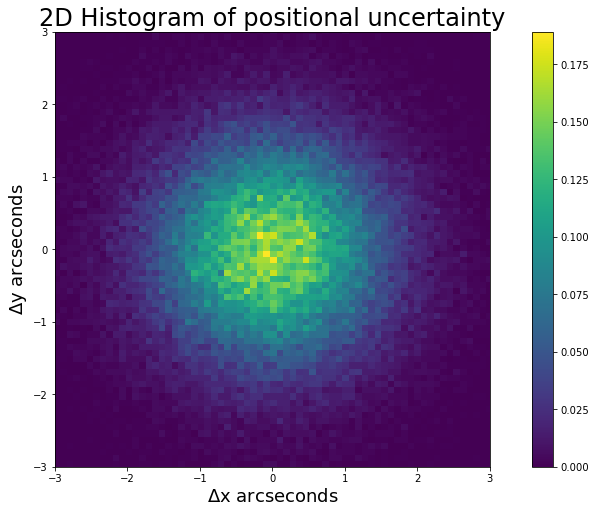

Mean Δx = -0.000985072598064432, Standard Deviation Δx = 0.9994366691239793
Mean Δx = -0.0013659895820438374, Standard Deviation Δx = 0.9984842142387383


In [86]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

meanX,sDevX = distProps(a[0,:])
meanY,sDevY = distProps(a[1,:])
print("Mean Δx = " + str(meanX) + ", Standard Deviation Δx = " + str(sDevX))
print("Mean Δx = " + str(meanY) + ", Standard Deviation Δx = " + str(sDevY))

In this situation, we're on a ground observatory that takes photos of the night sky at constant intervals. Due to atmospheric and instrumental effects, the stars in these photos get shifted around randomly. Each bin's color in this 2D histogram represents the portion of stars that moved by the respective Δx and Δy intervals of the bin. As you can see from the above plot, both positive and negative Δx and Δy movements are possible, and realistically stars don't need to move in discrete distances, implying that the pdf of this distribution is continuous. To fill these criteria, I'll assume that the Δx pdf and the Δy pdf are both Gaussians based on the means and standard deviations reported above. I'll draw a contour plot below to visualize this pdf:

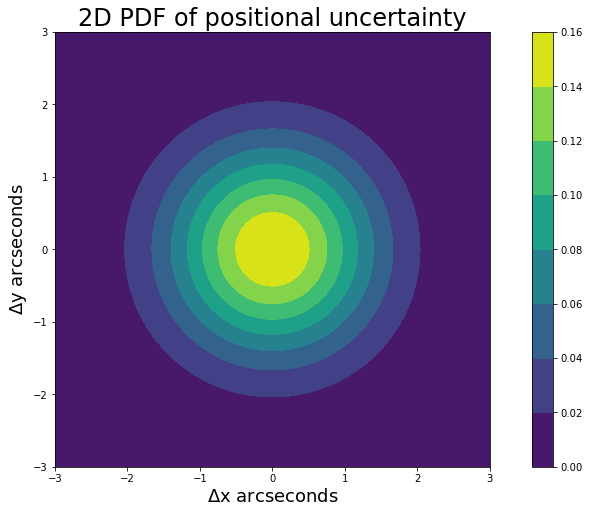

In [87]:
x = y = np.linspace(-3,3,1000)
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal', 'box')
x, y = np.meshgrid(x, y)
z = np.multiply(stats.norm.pdf(x,0,1),stats.norm.pdf(y,0,1))

plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.contourf(x, y, z)
plt.colorbar()
plt.title("2D PDF of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.show()

Among the photos of the stars, the observatory also spots a potential asteroid in a few subsequent photos. However, we only know the net scalar movement $ \Delta r = \sqrt{\Delta x^2 + \Delta y^2} $ of the asteroid between the two photos. *What minimum distance Δr does the potential asteroid need to travel between photos, in order to have a probability of 5 Sigma or less that its movement was just detected from a background star's movement?*<br>

First, I'll convert the 2D Δx and Δy Gaussian pdf's into a corresponding Δr pdf, this Δr pdf ends up being a Rayleigh pdf with its parameter being the Gaussians' standard deviation: ([Wikipedia](https://en.wikipedia.org/wiki/Rayleigh_distribution#Related_distributions))

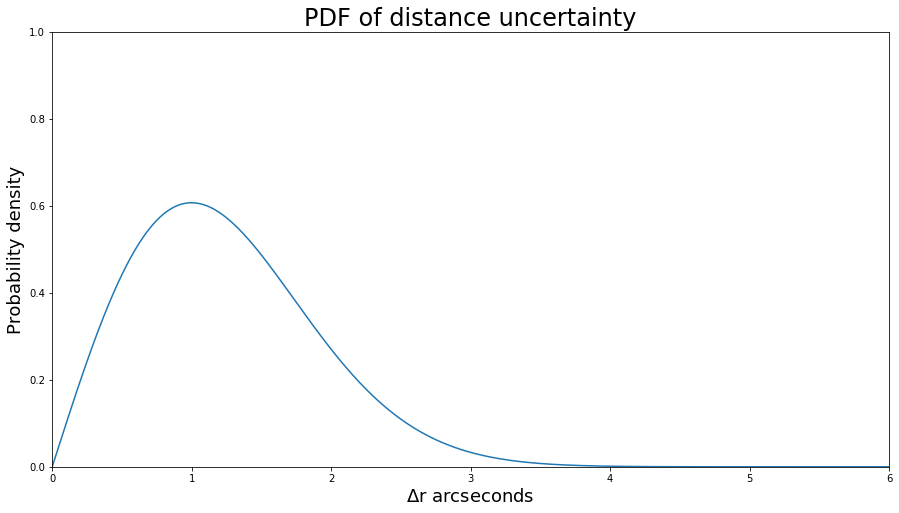

In [88]:
sDev = (sDevX+sDevY)/2 # Both are effectively equal to 1, so I'll just use their average.
r = np.linspace(0,6,1000)
p = stats.rayleigh.pdf(r,0,sDev)
fig, ax = plt.subplots(1, 1)
plt.xlim([0,6])
plt.ylim([0,1])
plt.plot(r,p)
plt.title("PDF of distance uncertainty", fontsize = 24)
plt.ylabel("Probability density", fontsize = 18)
plt.xlabel("$\Delta$r arcseconds", fontsize = 18)
plt.show()

Finally, I'll insert the 5 Sigma probability into the inverse of the Rayleigh integral (cdf) in order to find the 5 Sigma minimum distance threshold of the potential asteroid.

In [90]:
sig5 = 1 - stats.norm.cdf(5,0,1)
minR = stats.rayleigh.ppf(1-sig5,0,sDev)
print("Minimum distance threshold for a 5 Sigma detection: " + str(minR) + " arcseconds")

Minimum distance threshold for a 5 Sigma detection: 5.483373557491377 arcseconds


# Problem 3

In this scenario, we're looking at cosmic rays again. The path a cosmic ray takes across the galaxy and its magnetic field to eventually get to the Earth becomes less curved (radius of curvature $r = \frac{mv}{qB}$) when it has more kinetic energy, and as a result, can end up getting blocked directly by the Sun or the Moon. Looking at a Moon-sized patch of area in the sky, we can find an average of 1 cosmic ray every minute. Knowing this, we spent 8 hours each day for 15 days looking at the Moon, and found a total of 6800 cosmic rays. Note that the time spent measuring this equates to 7200 minutes, which says that on average if we looked at a Moon-sized patch of clear sky for the same amount of time, we would find 7200 cosmic rays. Since we measured from the Moon's direction, the stronger signal would be one that has lesser cosmic rays, since the high-energy cosmic rays get blocked out. *Now I want to know, what's the probability that a measurement of 6800 cosmic rays or less (from a Moon-sized patch in the sky) is a result of the background distribution of cosmic rays?*<br>

To solve this, I'll take the 7200th order convolution of the 1-minute Poisson measurement, which is just the 1-minute Poisson with its average multiplied by 7200, and take the integral from 0 to 6800 cosmic rays to find the probability I'm looking for.

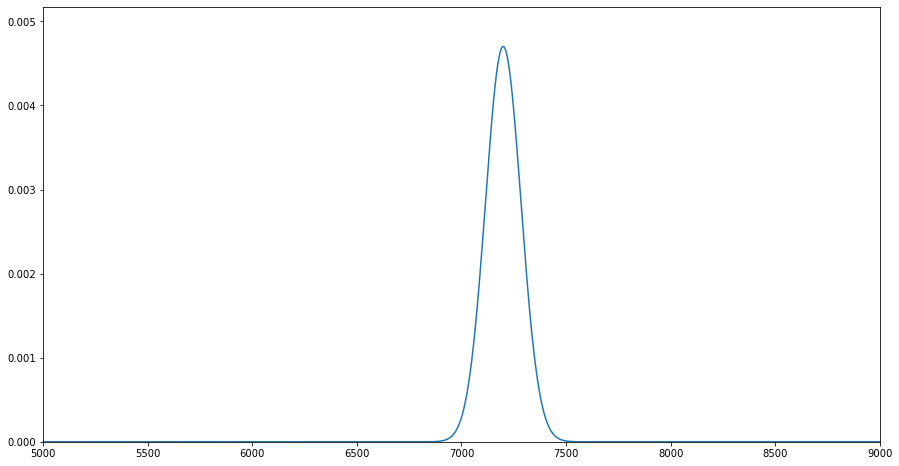

Probability of measuring 6800 cosmic rays from the background: 4.750747965778662 Sigma


In [101]:
avgRays = 1*60*8*15 # 1 avg ray per minute, 60 minutes in an hour, 8 hours measured over 15 days
x = np.linspace(0,12000,12001)
p = stats.poisson.pmf(x,avgRays) # convolution equivalent of 1-minute Poisson over all the measured minutes

fig, ax = plt.subplots(1, 1)
plt.xlim([5000,9000])
plt.ylim([0,1.1*max(p)])
plt.plot(x,p)
plt.show()

prob = stats.poisson.cdf(6800,avgRays)
sigma = stats.norm.ppf(1-prob,0,1)
print("Probability of measuring 6800 cosmic rays from the background: " + str(sigma) + " Sigma")

The significance of this 6800 cosmic ray measurement is slightly less than 5 Sigma, but I'd say that it's enough to acknowledge that a decent portion of cosmic rays do get blocked by the Moon.